In [2]:
%run pylib/summary
self = Summary(show_confusion=False, 
             title="""Summarize HCU properties.""")
fignum=11

# Summarize HCU properties.

<h5 style="text-align:right; margin-right:15px"> 2023-09-10 09:19</h5>

## Select subset for following: 0.25 < $E_p$ < 6 and $d_p$>0.15 

## Plot $d_p$ vs. $E_p$ on log scales
The dotted line is the measured dependence of the mean for pulsars,
$E_p = 1.1\ \mathrm{GeV}\ (d_p/0.46)^{1.33}$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7faa1f1d1f00>
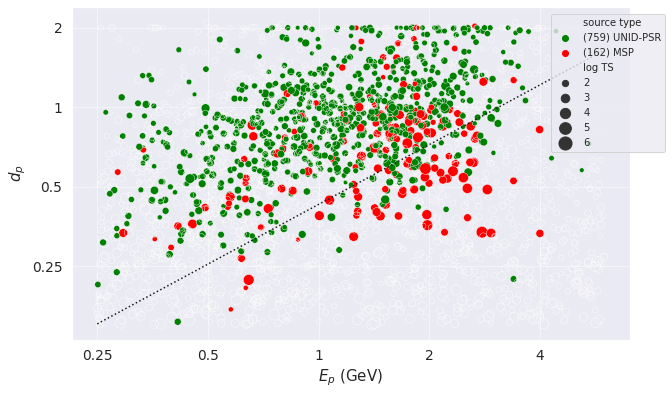

### Plot the difference

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7faa1f00b520>
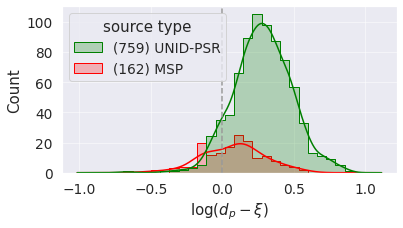

In [3]:
# show(pulsar_curvature.__doc__)  
def show_dp_vs_ep(self, fignum, **kwargs):
    df = self.df
    fig, ax = plt.subplots(figsize=(10,6))
    
    data_kw= dict(data=self.df, x='log_epeak', y='log_dp' )
    size_kw = dict(size='log TS', sizes=(20,200) )
    sns.scatterplot(**data_kw,  **self.hue_kw,  **size_kw ,)
    
    xx = np.log10((0.25,6)) 
    ax.plot(xx, pulsar_curvature(xx), 'k', ls=':');
    axis_kw= lambda a, label, v: {f'{a}label':label,f'{a}ticks':np.log10(v), f'{a}ticklabels':v }

    ax.set(**axis_kw('x','$E_p$ (GeV)', [0.25,0.5,1,2,4]),
           **axis_kw('y','$d_p$', [0.25,0.5,1,2]) )
    update_legend(ax, df, hue='source type',  fontsize=10,
                bbox_to_anchor=(0.85,0.55))
    show(f"""## Plot $d_p$ vs. $E_p$ on log scales
    The dotted line is the measured dependence of the mean for pulsars,
    $E_p = 1.1\ \mathrm{{GeV}}\ (d_p/0.46)^{{1.33}}$
    """)
    show(fig, fignum=fignum, caption=r"""Scatter plot of $d_p$ vs $E_p$ for UNID_PSR and MSP sources.
      """)
    
    show(f"""### Plot the difference""")
    
    fig, ax = plt.subplots(figsize=(6,3))
    sns.histplot(df, ax=ax, x=df.log_dp-df.xi, **self.hue_kw, 
                kde='True', element='step');
    ax.set(xlabel=r'$\log(d_p-\xi)$');
    ax.axvline(0, ls='--', color='0.6')
    update_legend(ax, df, hue='source type');
    show(fig, fignum=fignum+1, 
        caption=r"""Histogram of the log curvature difference, where $\xi$ is the pulsar mean,
        $d_p(E_p)$. """)
show_dp_vs_ep(self, fignum=fignum)

## $F_p$ vs. $|\sin(b)|$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7faa1eec3190>
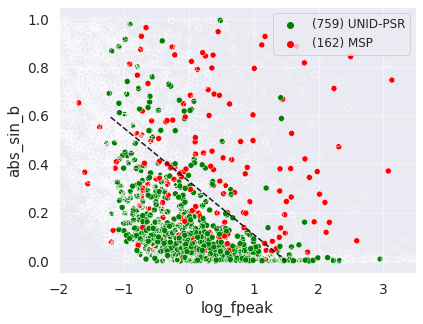

Now select those below the dashed line... 

## Where are they? 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7faa1ef421d0>
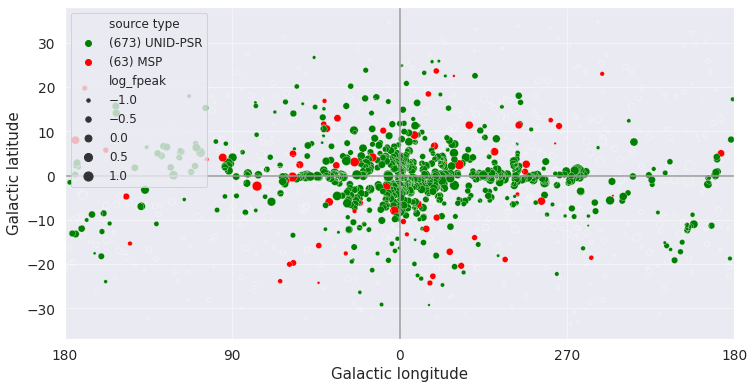

In [4]:
dfx = self.fp_vs_sinb(fignum+3)


show(f"""## Where are they? """)
self.skyplot( fignum+4, dfx)


### Zoom in 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa9f126f0d0>
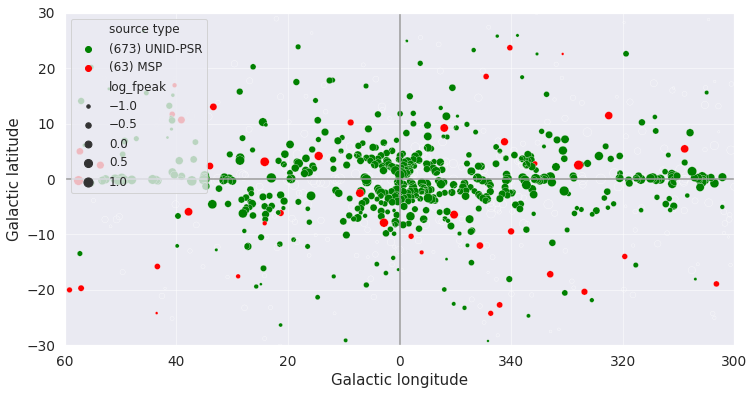

In [5]:
show(f"""### Zoom in """)
self.skyplot(fignum+5, dfx, xlim=(60,-60),ylim=(-30,30), 
        xticks=np.arange(60,-61,-20),)

In [6]:
summary_file = 'files/summary.csv'
show(f'## Write summary to `{summary_file}`')
df = self.df.copy()
df['Ep'] = np.power(10, df.log_epeak)
df['Fp'] = np.power(10, df.log_fpeak)
cols='glon glat ts r95 curvature Fp Ep'.split()+['source type']
rows = np.isin(df['source type'].values, 'UNID-PSR young MSP'.split())
df.loc[rows, cols].to_csv(summary_file, float_format='%.3f' )

##Write summary to `files/summary.csv`